In [ ]:
import pandas as pd # for data manipulation and preprocessing
import numpy as np # for computations

In [7]:
df = pd.read_csv('/Microsoft_Stock.csv')
df.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


## Data does not have any null values

In [9]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


In [10]:
df.shape

(1511, 6)

In [11]:
df1 = df.dropna(axis=0, how='any')
df1.shape

(1511, 6)

### no missing values found so we can use df

In [12]:
# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

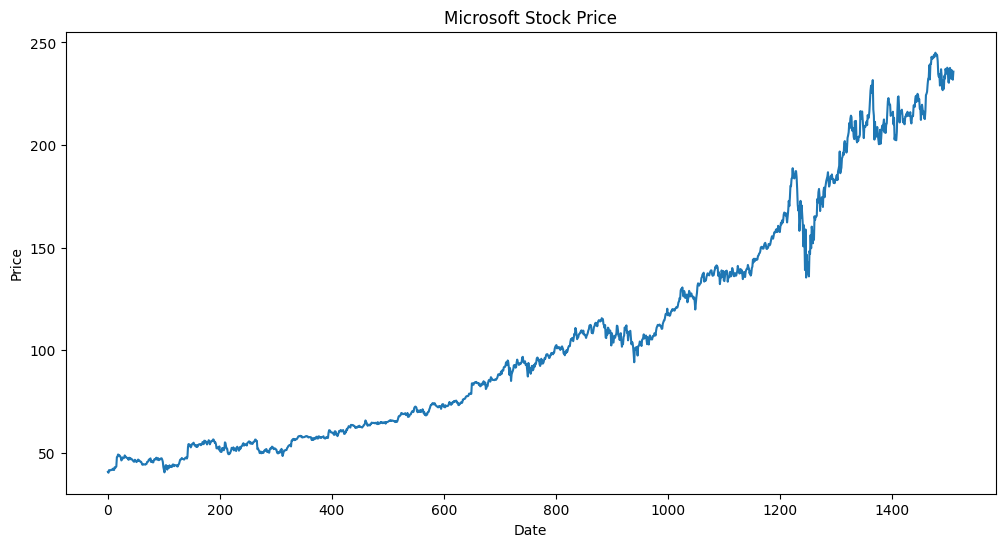

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df['Close'])
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

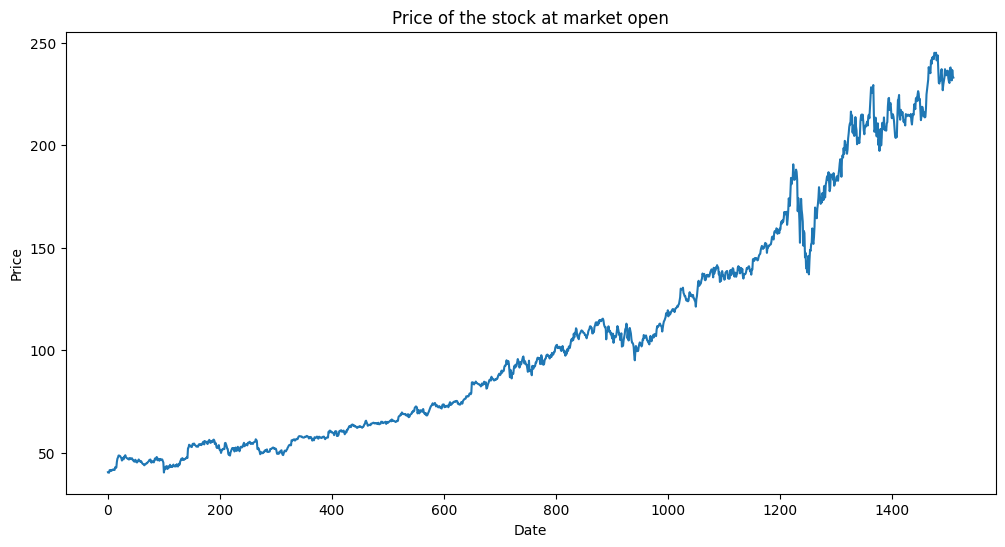

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df['Open'])
plt.title('Price of the stock at market open')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

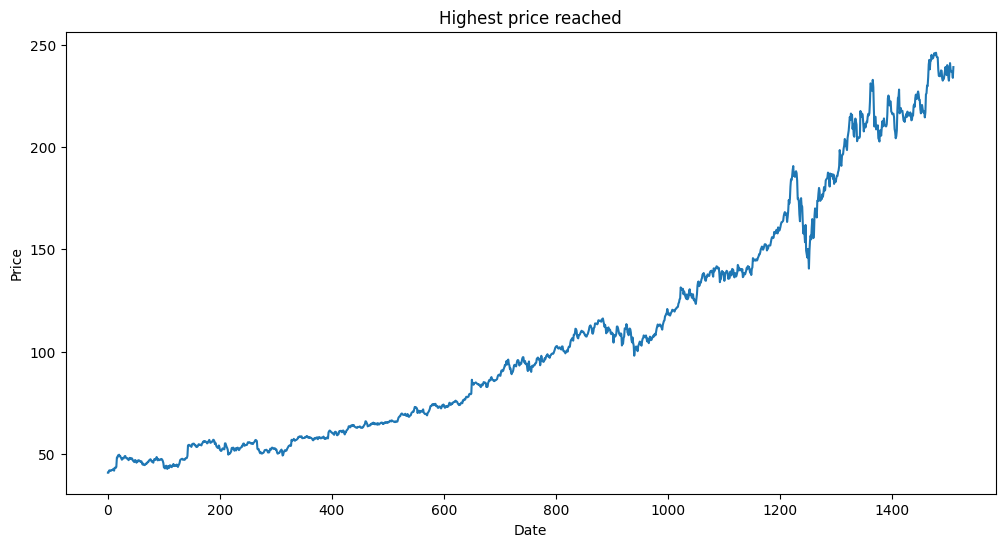

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df['High'])
plt.title('Highest price reached')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

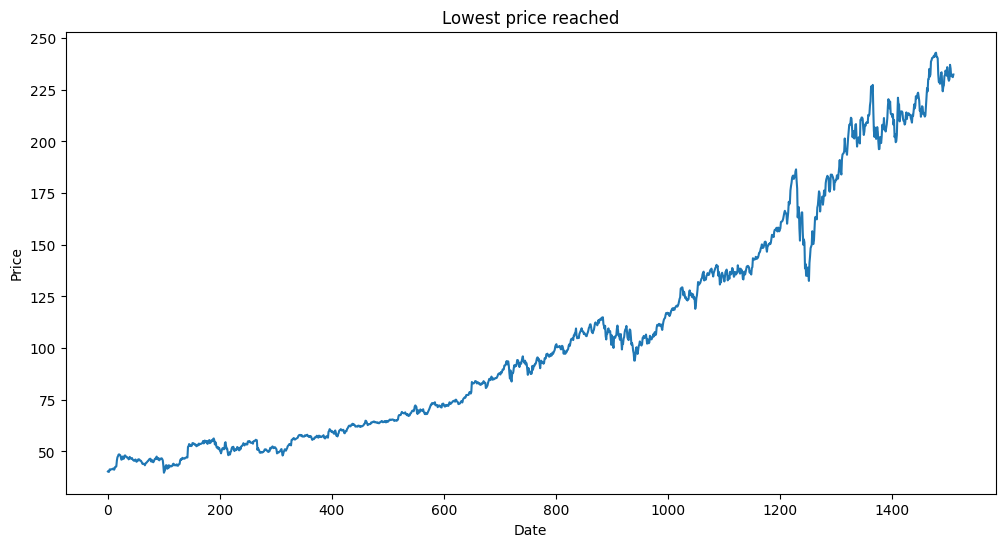

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df['Low'])
plt.title('Lowest price reached')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

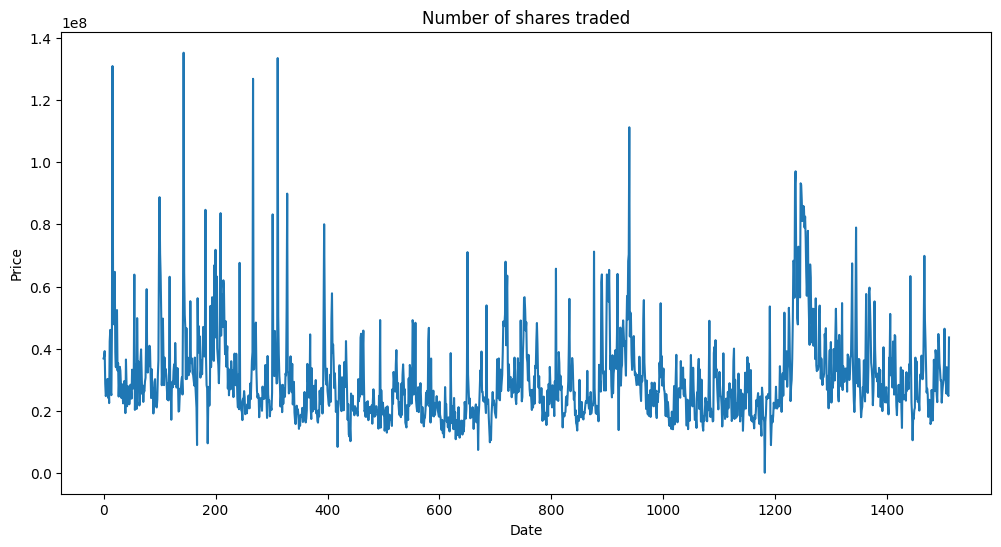

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Volume'])
plt.title('Number of shares traded')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### From the previous we notice that generally the prices has an increasing trend while volume is seasonal

<Axes: >

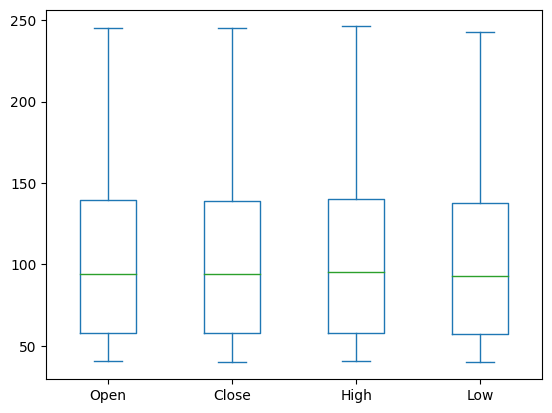

In [29]:
#check for outliers
df[['Open','Close','High','Low']].plot(kind="box")

In [30]:
#convert to date time format
df['Date'] = pd.to_datetime(df['Date'])

## Build linear regression model

In [36]:
from sklearn.model_selection import train_test_split

X= np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [48]:
import plotly.graph_objs as go
from plotly.offline import plot
from plotly.offline import iplot
# plot actual and predicted plots
actual = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name ="actual"
)
predicted = go.Scatter(
    x = X_train.T[0],
    y = lr.predict(X_train).T,
    mode="lines",
    name = 'predicted'

)
df_data = [actual,predicted]
plt1 = go.Figure(data= df_data)
iplot(plt1)

In [50]:
# model evaluation

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lr.predict(X_train))}\t{r2_score(Y_test,lr.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train,lr.predict(X_train))}\t{mse(Y_test,lr.predict(X_test))}
'''
print(scores)



Metric           Train                Test        
r2_score  0.9035787993102663	0.8871001507798576
MSE       316.8745935222523	329.5591186501683

